In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd

ox.config(log_console=True, use_cache=True)
weight_by_length = False

ox.__version__

/tmp/ipykernel_120899/2006466983.py:7: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(log_console=True, use_cache=True)


'1.6.0'

In [15]:
places = {
    'The Hague': 'The Hague, Netherlands',
}

In [16]:
# verify OSMnx geocodes each query to what you expect (a [multi]polygon geometry)
gdf = [ox.geocode_to_gdf(p) for p in places.values()]
gdf

[                                            geometry  bbox_north  bbox_south  \
 0  POLYGON ((4.18500 52.06145, 4.18941 52.05920, ...   52.135036   52.014848   
 
    bbox_east  bbox_west   place_id  osm_type  osm_id        lat       lon  \
 0    4.42249   4.184998  307670336  relation  192737  52.079984  4.311346   
 
       class            type  place_rank  importance addresstype       name  \
 0  boundary  administrative          16    0.677318        city  The Hague   
 
                             display_name  
 0  The Hague, South Holland, Netherlands  ]

In [5]:
# G = ox.graph_from_place('London, UK', network_type='drive')

In [6]:
# Gu = ox.add_edge_bearings(ox.get_undirected(G))

In [7]:
# fig = ox.plot_orientation(Gu, title='London', title_font='Econ Sans')[0]
# # suptitle_font = {'family':'Econ Sans', 'fontsize':24, 'fontweight':'normal', 'y':1.07, 'fontstyle': 'normal'}
# # fig.suptitle('London, UK', **suptitle_font)
# fig.tight_layout()
# fig.subplots_adjust(hspace=0.35)
# fig.savefig('plots/london.svg', bbox_inches='tight')
# fig

2023-08-26 13:05:20.758308 The Hague


findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.


saving plots/The Hague.svg


findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.
findfont: Font family 'Econ Sans' not found.


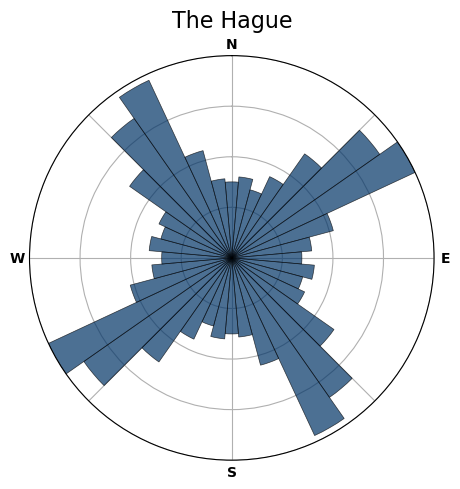

In [17]:
plots = {}
for place in sorted(places.keys()):
    print(datetime.datetime.now(), place)
    
    # get the graph
    query = places[place]
    G = ox.graph_from_place(query, network_type='drive')
    
    # calculate edge bearings
    Gu = ox.add_edge_bearings(ox.get_undirected(G))

    title_font = {'family':'Econ Sans', 'fontsize': 16, 'fontweight':'normal', 'y':1.07, 'fontstyle': 'normal'}
    fig = ox.plot_orientation(
        Gu,
        title=place,
        title_font=title_font,
    )[0]
    fig.tight_layout()
    print(f'saving plots/{place}.svg')
    fig.savefig(f'plots/{place}.svg', bbox_inches='tight')
